In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [51]:
df=pd.read_csv("smartcart_customers.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [52]:
df.shape

(2240, 22)

In [53]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Preprocessing

**1. Handle Missing Values**


In [55]:
Median_income=df["Income"].median()
df["Income"]=df["Income"].fillna(Median_income)

In [56]:
df["Income"].isnull().sum()

0

## Feature Engineering

In [57]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

In [58]:
df["Age"]=2026-df["Year_Birth"]

In [59]:
df["Age"]

0       69
1       72
2       61
3       42
4       45
        ..
2235    59
2236    80
2237    45
2238    70
2239    72
Name: Age, Length: 2240, dtype: int64

In [60]:
#Customer Joining Days
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)
reference_date=df["Dt_Customer"].max()
df["Customer_Tenure_Days"]=(reference_date-df["Dt_Customer"]).dt.days

In [61]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [62]:
#Total Spending

df["Total_Spending"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,0,1,69,663,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,0,0,72,113,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,61,312,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,0,0,42,139,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,45,161,422


In [63]:
#Children
df["Total_Children"]=df["Kidhome"]+df['Teenhome']

In [64]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,139,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,161,422,1


In [65]:
#Education
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [66]:
#Undergraduate, Graduate, Postgraduate
df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate",
                         "Master":"Postgraduate","PhD":"Postgraduate"},inplace=True)
df["Education"].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_21516\219055329.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate",


Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [67]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,139,53,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,161,422,1


In [68]:
#Marital Status
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [69]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Single":"Alone","Divorced":"Alone",
                                             "Widow":"Alone","Absurd":"Alone","YOLO":"Alone"})

In [70]:
df["Living_With"].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

## Drop Columns

In [71]:
df.shape

(2240, 27)

In [72]:
cols=["ID","Year_Birth","Marital_Status","Kidhome","Teenhome","Dt_Customer"]
spending_cols=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
cols_to_drop=cols+spending_cols
df_cleaned=df.drop(columns=cols_to_drop)

In [73]:
df_cleaned.shape

(2240, 15)

In [74]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


## Outliers

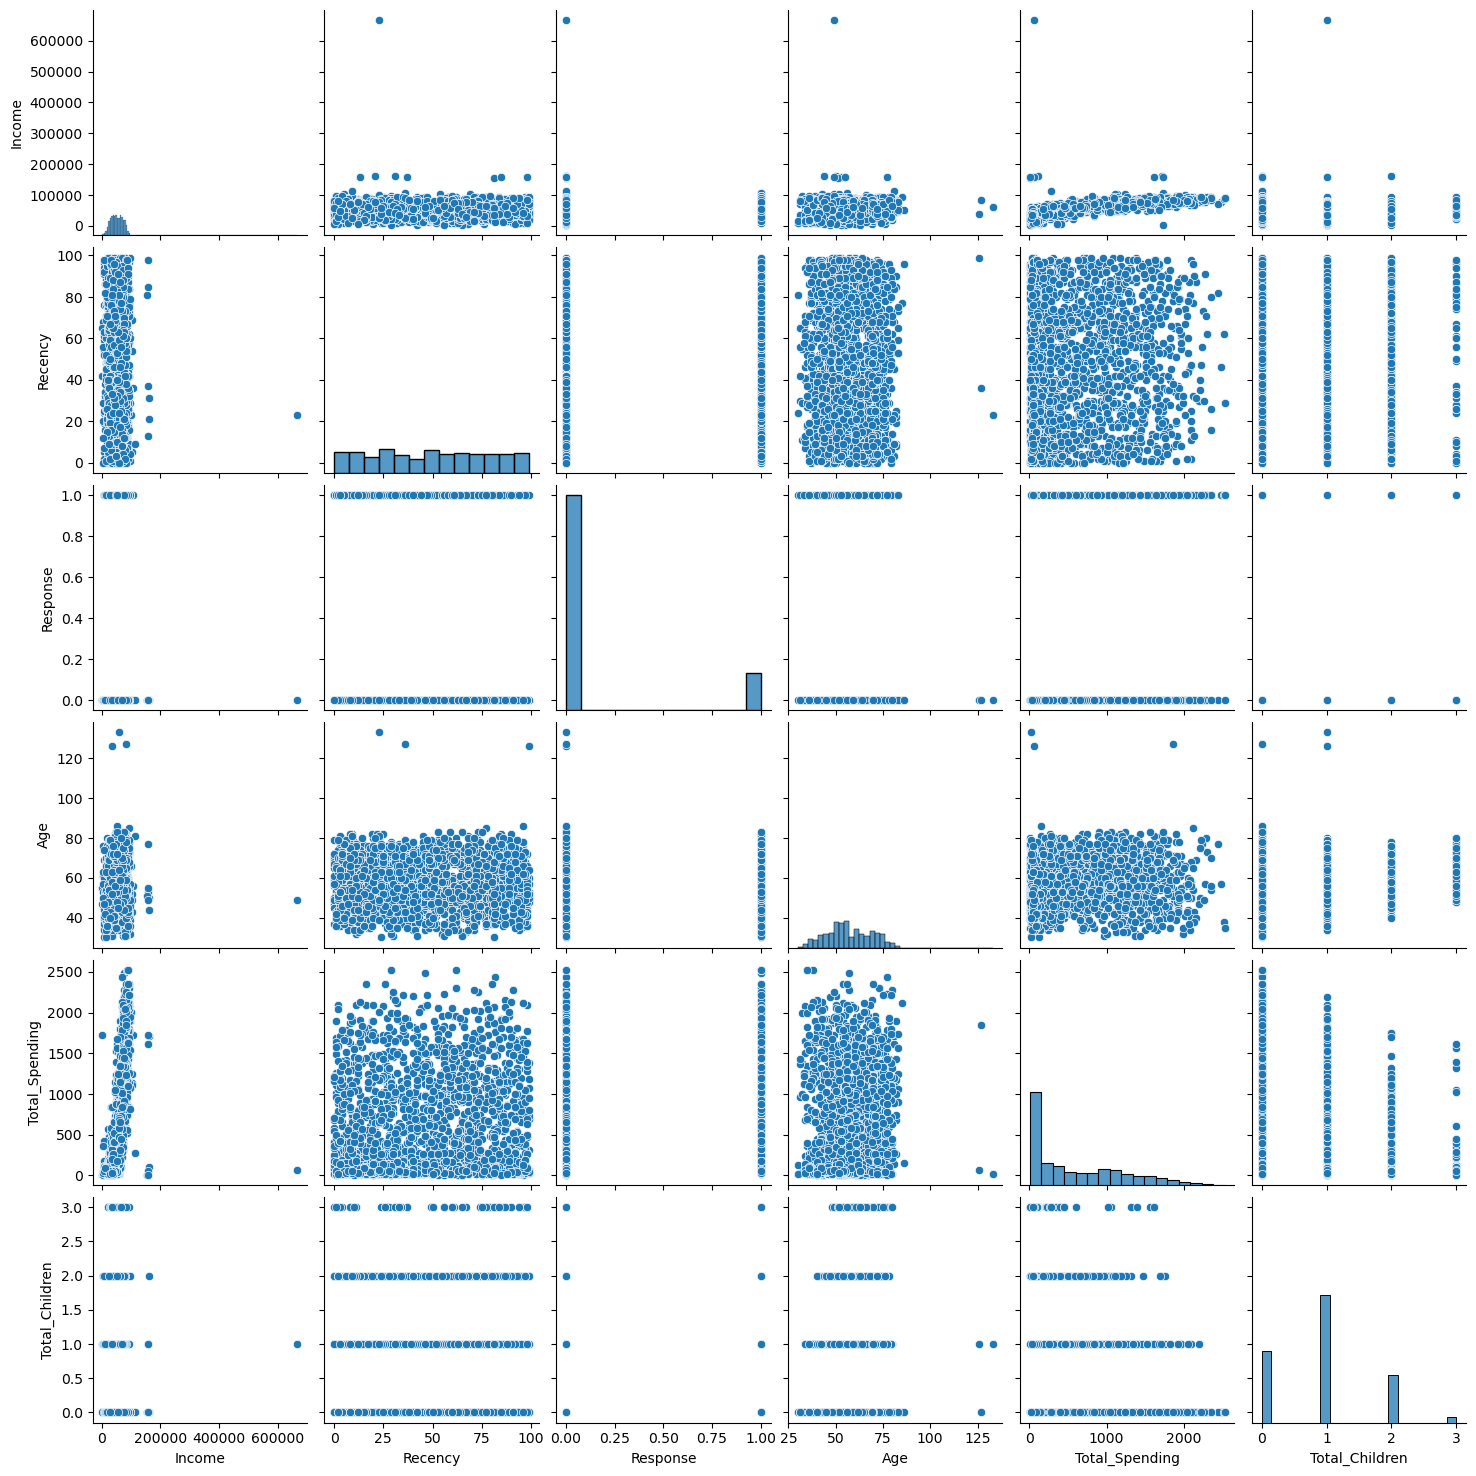

In [75]:
cols=["Income","Recency","Response","Age","Total_Spending","Total_Children"]
sns.pairplot(df_cleaned[cols])

In [76]:
#Remove the outliers
print("Data Size With Outliers: ",len(df_cleaned))
df_cleaned=df_cleaned[(df_cleaned["Age"]<90)]
df_cleaned=df_cleaned[(df_cleaned["Income"]<600_000)]
print("Data Size Without Outliers: ",len(df_cleaned))

Data Size With Outliers:  2240
Data Size Without Outliers:  2236


## Heatmap

<Axes: >

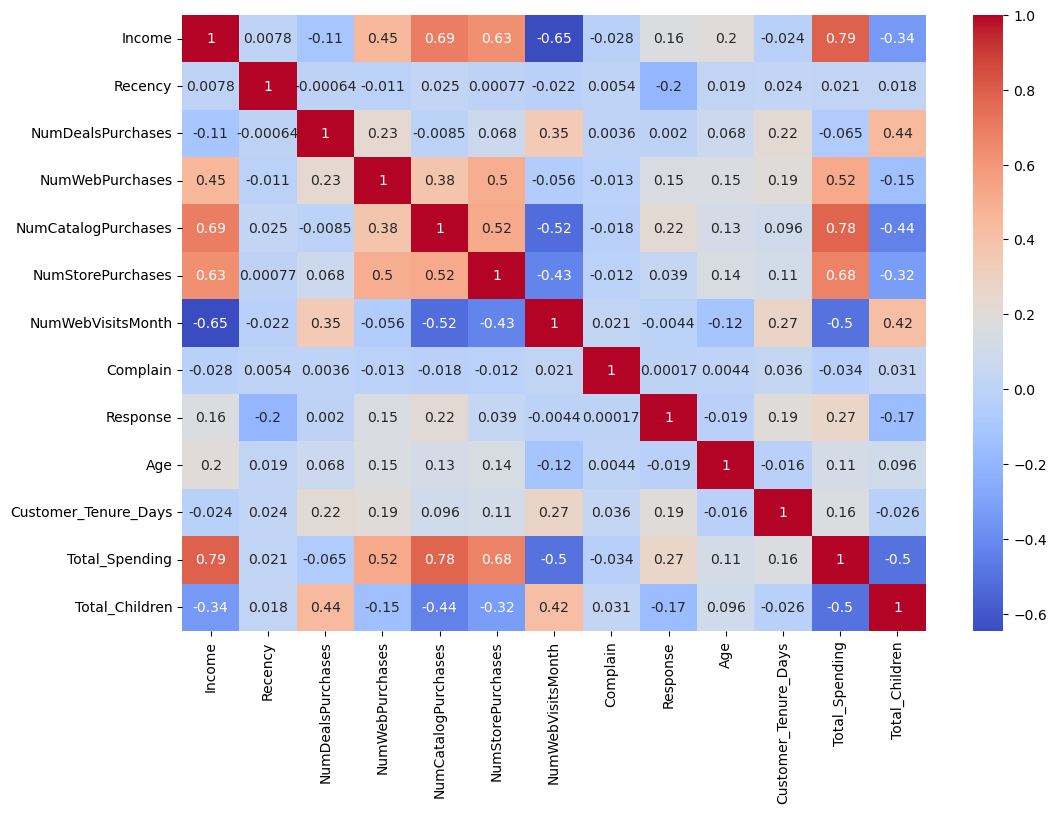

In [77]:
corr=df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [78]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


## Encoding

In [79]:
ohe=OneHotEncoder()
cat_cols=["Education","Living_With"]
enc_cols=ohe.fit_transform(df_cleaned[cat_cols])
enc_df=pd.DataFrame(enc_cols.toarray(),columns=ohe.get_feature_names_out(cat_cols),index=df_cleaned.index)

In [80]:
enc_df.head()

,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [81]:
df_encoded=pd.concat([df_cleaned.drop(columns=cat_cols),enc_df],axis=1)

In [82]:
df_encoded.shape

(2236, 18)

In [83]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


## Scaling

In [84]:
x=df_encoded

In [85]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74204052,  0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74204052,  0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74204052,  0.74204052]])

## Visualize

In [86]:
x_scaled.shape

(2236, 18)

In [87]:
#2D
pc=PCA(n_components=3)
x_pca=pc.fit_transform(x_scaled)

In [88]:
pc.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

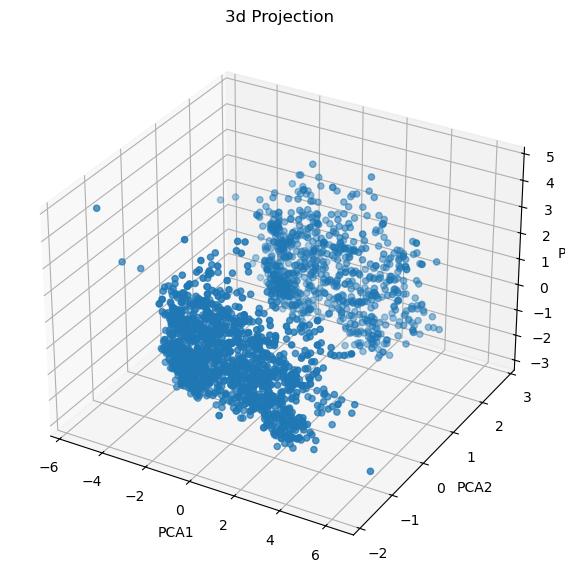

In [89]:
fig=plt.figure(figsize=(10,7))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d Projection")

plt.show()

## Analyze K Value

**1.Elbow Method**

In [90]:
wcss=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(x_pca)
    wcss.append(km.inertia_)
wcss

[10760.733824343279,
 8209.690915623349,
 6651.05941329831,
 5006.14613568309,
 4353.8041113923155,
 3857.4230121140217,
 3206.9632931664482,
 3006.166766857581,
 2489.8331401565874]

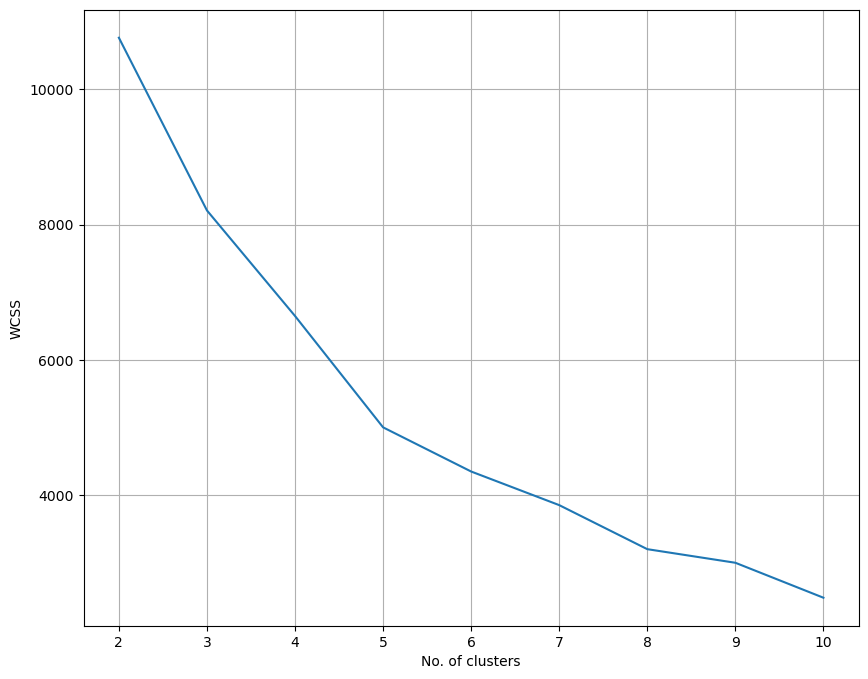

In [91]:
plt.figure(figsize=(10,8))
plt.plot([i for i in range(2,11)],wcss)
plt.xticks([i for i in range(2,11)])
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

**2.Silhouette Score**

In [92]:
ss=[]
for i in range(2,11):
    km=KMeans(n_clusters=i)
    labels=km.fit_predict(x_pca)
    ss.append(silhouette_score(x_pca,labels))
ss

[0.37155306431691326,
 0.36752024478590023,
 0.398398156414712,
 0.39954540358687374,
 0.4030774237079375,
 0.39548344154246917,
 0.40416407945365895,
 0.3919582309211864,
 0.3920972351625073]

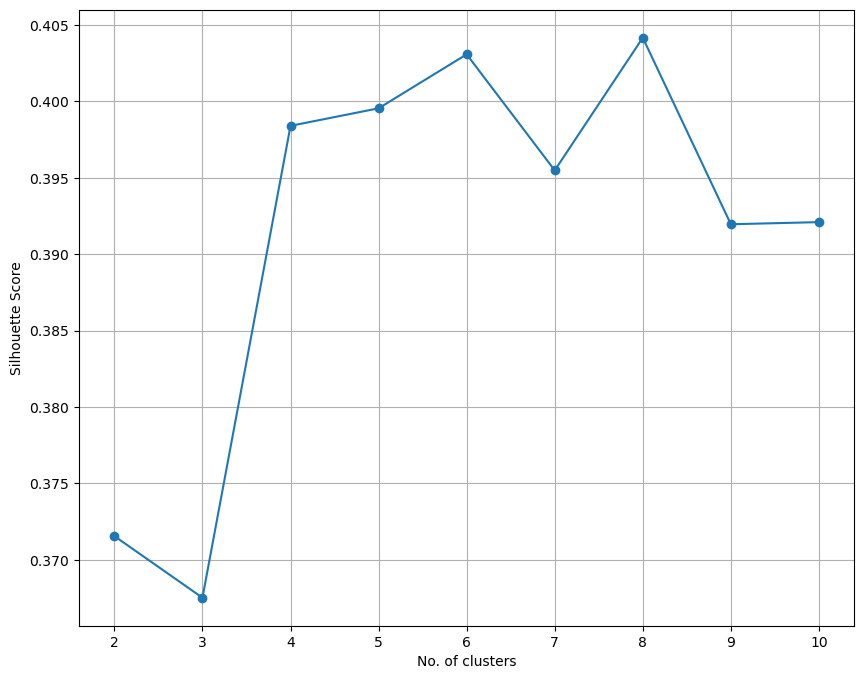

In [94]:
plt.figure(figsize=(10,8))
plt.plot([i for i in range(2,11)],ss,marker="o")
plt.xticks([i for i in range(2,11)])
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

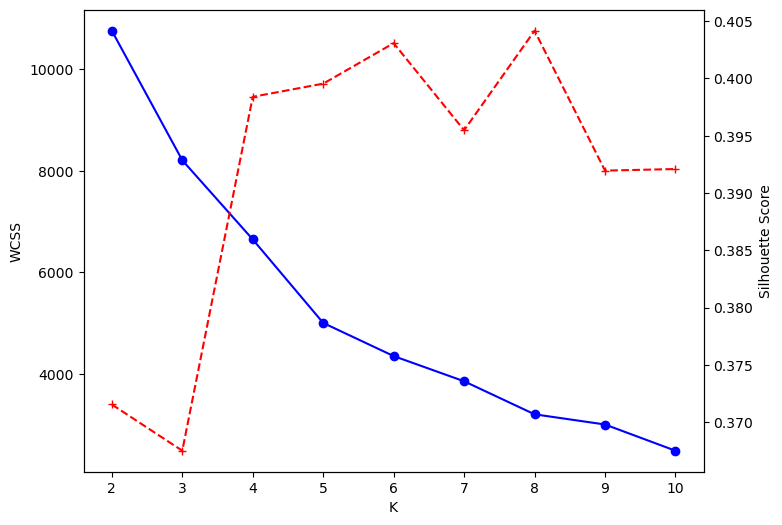

In [100]:
#Combined Plot

k_range=range(2,11)
fig,ax1=plt.subplots(figsize=(8,6))

ax1.plot(k_range,wcss[:len(k_range)],marker="o",color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2=ax1.twinx()
ax2.plot(k_range,ss[:len(k_range)],marker="+",color="red",linestyle="dashed")
ax2.set_ylabel("Silhouette Score")

plt.show()

## Clustering

**K-Means**

In [101]:
km=KMeans(n_clusters=4)
kmeans_labels=km.fit_predict(x_pca)

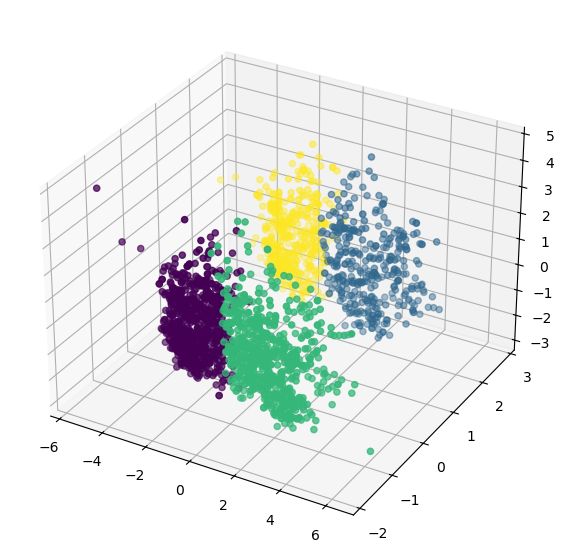

In [103]:
fig=plt.figure(figsize=(10,7))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=kmeans_labels)
plt.show()

**Agglomerative Clustering**

In [107]:
agg_clf=AgglomerativeClustering(n_clusters=4,linkage="ward")
agglomerative_labels=agg_clf.fit_predict(x_pca)

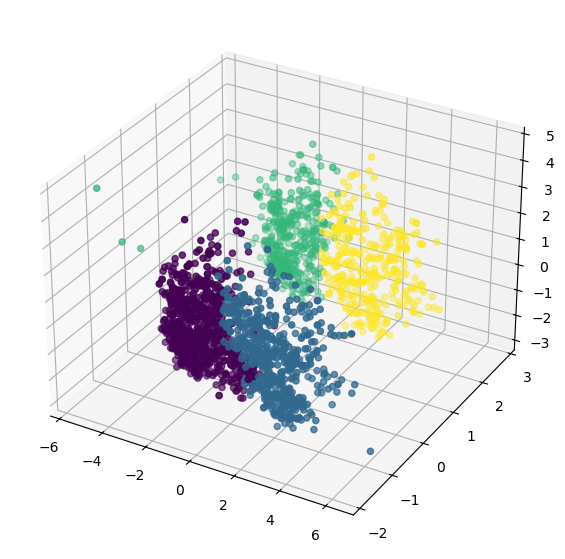

In [108]:
fig=plt.figure(figsize=(10,7))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=agglomerative_labels)
plt.show()

## Charracterization of Clusters

In [116]:
x["cluster"]=agglomerative_labels
x.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

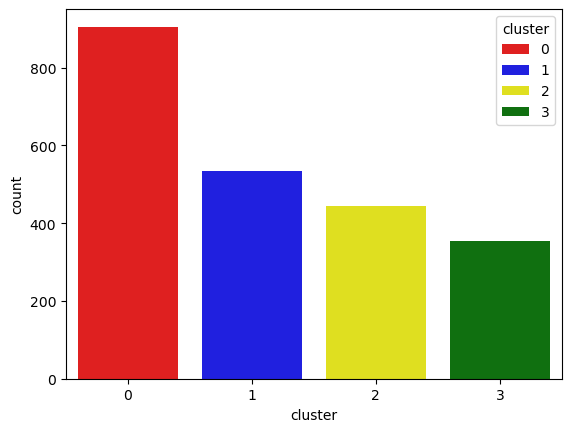

In [117]:
palette=["red","blue","yellow","green"]
sns.countplot(x=x["cluster"],palette=palette,hue=x["cluster"])

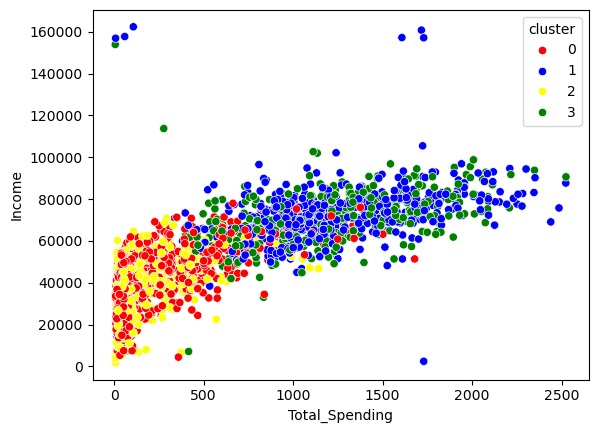

In [118]:
#Income and Spending patterns

sns.scatterplot(x="Total_Spending",y="Income",data=x,palette=palette,hue="cluster")
plt.show()

In [119]:
#Cluster Summary
cluster_summary=x.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         

In [122]:
print(x.columns,x.shape)

Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'Total_Spending',
       'Total_Children', 'Education_Graduate', 'Education_Postgraduate',
       'Education_Undergraduate', 'Living_With_Alone', 'Living_With_Partner',
       'cluster'],
      dtype='object') (2236, 19)
